### label.mat 에서 mask 관련 정보 추출

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
cd mask_mobilenet/

/content/gdrive/My Drive/mask_mobilenet


# 5_27 파일 다시 분류

In [0]:
pwd

'/content/gdrive/My Drive/mask_mobilenet'

In [0]:
import shutil
i = 0
for filename in range(4936): # nb_naked 도 하면 됨 
    try :
        need_num_zero = 8 - len(str(filename)) # 00000001 꼴 맞춰주기위해
        filename = "test_" + '0'*need_num_zero + str(filename) + ".jpg" # train_00000001.jpg 꼴 완성

        From = "./test-images/NAKED_test/" # 옮길 파일이 있는 위치
        To = "./test-images/images/" # 옮기고 싶은 위치
        shutil.move(From + filename, To + filename)

        print(filename, "success!")

    except FileNotFoundError :  # 파일 없는 경우에는 생략
        pass

    # if i % 2000 == 0:
    #     print(i)
    # i += 1

In [0]:
len(str(1000))

4

In [0]:
import scipy.io
import csv
import pandas
import sys
import pandas as pd

is_train = True # 데이터셋 구분 flag (default : Train set)
label_list_train = [] # 최종 label 리스트 : (num_image, [occ_type, occ_degree]) 형태
label_list_test = []
label_files = ['./LabelTrainAll.mat', './LabelTestAll.mat']

for filename in label_files :
    if filename == './LabelTestAll.mat' : # test set 이면
        is_train = False
    
    # label 불러오기
    mat = scipy.io.loadmat(filename)
    if is_train : # train set
        lst = mat.get('label_train') 
    else :  # test set
        lst = mat.get('LabelTest')

    # label 정보 중, [occ_type]과 [occ_degree]만 추출하여 이미지 번호와 함께 저장.
    info_mask = []
    num_data = len(lst[0]) # 데이터 총 갯수
    for idx in range(num_data) :
        if is_train :
            tmp_array = lst[0][idx][2] # 이미지의 모든 정보 format이 들어있는 위치 (train)
        else :
            tmp_array = lst[0][idx][1] # test set 경우는 끝 인덱스가 달라짐
            
        targetList = tmp_array.tolist() # numpy ndarray -> 리스트로 변환
        info_label = [row for row in targetList[0]] # 차원 축소

        # info_label[12] : occ_type {★★1.simple(의료용마스크)★★ // 2.complex(그 외) // 3.human body(손 등)}
        # info_label[13] : occ_degree ( 1.얼굴 다 보임  // 2.코 보임  // ★★3.다 가림★★ )

        if is_train:
            info_mask.append([info_label[12], info_label[13]]) # [occ_type, occ_degree] 형태로 저장
        else:
            info_mask.append([info_label[9], info_label[10]]) # [occ_type, occ_degree] 형태로 저장

    # 이미지 번호와 함께 저장 :  (num_image, [occ_type, occ_degree]) 형태
    for info in enumerate(info_mask, start = 1) :
        if is_train : # train set
            label_list_train.append(info)
        else : # test set
            label_list_test.append(info)

print(label_list_train)
print(label_list_test)

[(1, [1, 3]), (2, [2, 3]), (3, [1, 3]), (4, [2, 3]), (5, [1, 1]), (6, [1, 1]), (7, [1, 3]), (8, [3, 2]), (9, [1, 2]), (10, [3, 2]), (11, [1, 3]), (12, [1, 3]), (13, [1, 3]), (14, [1, 3]), (15, [1, 3]), (16, [1, 3]), (17, [1, 3]), (18, [1, 3]), (19, [1, 3]), (20, [1, 3]), (21, [1, 3]), (22, [1, 3]), (23, [2, 1]), (24, [1, 3]), (25, [1, 3]), (26, [1, 3]), (27, [1, 3]), (28, [1, 2]), (29, [1, 3]), (30, [2, 3]), (31, [1, 3]), (32, [1, 3]), (33, [1, 3]), (34, [1, 3]), (35, [1, 3]), (36, [1, 2]), (37, [1, 3]), (38, [1, 3]), (39, [1, 3]), (40, [1, 3]), (41, [1, 3]), (42, [1, 3]), (43, [1, 3]), (44, [1, 3]), (45, [1, 3]), (46, [1, 3]), (47, [1, 3]), (48, [1, 3]), (49, [1, 3]), (50, [1, 3]), (51, [1, 3]), (52, [1, 3]), (53, [1, 3]), (54, [1, 3]), (55, [1, 3]), (56, [1, 3]), (57, [1, 3]), (58, [1, 3]), (59, [1, 3]), (60, [1, 3]), (61, [1, 3]), (62, [1, 3]), (63, [1, 3]), (64, [1, 3]), (65, [1, 3]), (66, [1, 3]), (67, [1, 3]), (68, [1, 3]), (69, [1, 3]), (70, [1, 3]), (71, [1, 3]), (72, [1, 3]), 

### 마스크 상태별 리스트 (★★ Train Set ★★)
#### * 잘 쓴 기준 : occ_type = 1 or 2,  occ_degree = 3

In [0]:
nb_masked = [] # 마스크 잘 씀
nb_naked = []  # 마스크 제대로 안 씀

for info in label_list_train :
    if info[1][0] == 1 or info[1][0] == 2:
        if info[1][1] == 3 :
            nb_masked.append(info[0])
        else :
            nb_naked.append(info[0])

print("< TrainSet_info >")
print("total data :", len(label_list_train))
print("num_masked : ", len(nb_masked))
print("num_naked : ", len(nb_naked))

print()
print("< num of masked >")
print(nb_masked)
print("<num of naked")
print(nb_naked)

< TrainSet_info >
total data : 25876
num_masked :  21636
num_naked :  2220

< num of masked >
[1, 2, 3, 4, 7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,

In [0]:
25876 in nb_naked

False

# 조건에 맞춰 파일 이동시키기 (local 파일)

In [0]:
import shutil
i = 0
for filename in nb_masked[14000:]: # nb_naked 도 하면 됨 
    try :
        need_num_zero = 8 - len(str(filename)) # 00000001 꼴 맞춰주기위해
        filename = "train_" + '0'*need_num_zero + str(filename) + ".jpg" # train_00000001.jpg 꼴 완성

        From = "./train-images/images/" # 옮길 파일이 있는 위치
        To = "./train-images/MASKED_train/" # 옮기고 싶은 위치
        shutil.move(From + filename, To + filename)

        
        print(filename, "success!")

    except FileNotFoundError :  # 파일 없는 경우에는 생략
        pass

    # if i % 200 == 0:
    #     print(i)
    # i += 1

In [0]:
len(nb_naked)

2220

In [0]:
import shutil
i = 0
for filename in nb_naked: # nb_naked 도 하면 됨 
    try :
        need_num_zero = 8 - len(str(filename)) # 00000001 꼴 맞춰주기위해
        filename = "train_" + '0'*need_num_zero + str(filename) + ".jpg" # train_00000001.jpg 꼴 완성

        From = "./train-images/images/" # 옮길 파일이 있는 위치
        To = "./NAKED_train/" # 옮기고 싶은 위치
        shutil.move(From + filename, To + filename)

    except FileNotFoundError :  # 파일 없는 경우에는 생략
        pass
        
    if i % 500 == 0:
        print(i, filename)
    i += 1

0 train_00000005.jpg
500 train_00008736.jpg
1000 train_00014938.jpg
1500 train_00018360.jpg
2000 train_00023450.jpg


### 마스크 상태별 리스트 (★ Test Set ★)
#### * 잘 쓴 기준 : occ_type = 1 or 2,  occ_degree = 3

In [0]:
nb_masked_test = [] # 마스크 잘 씀
nb_naked_test = []  # 마스크 제대로 안 씀

for info in label_list_test :
    if info[1][0] == 1 or info[1][0] == 2: # occ_type
        if info[1][1] == 3 : # occ_degree
            nb_masked_test.append(info[0])
        else :
            nb_naked_test.append(info[0])

print("< TestSet_info >")
print("total data :", len(label_list_test))
print("num_masked : ", len(nb_masked_test))
print("num_naked : ", len(nb_naked_test))

print()
print("< num of masked >")
print(nb_masked_test)

print("< num of naked >")
print(nb_naked_test)

< TestSet_info >
total data : 4935
num_masked :  3880
num_naked :  495

< num of masked >
[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212

# 조건에 맞춰 파일 이동시키기 (local 파일) - Test

In [0]:
nb_masked_test

In [0]:
import shutil
i = 0
for filenumber in nb_naked_test: # nb_naked_test 도 하면 됨
    try :
        need_num_zero = 8 - len(str(filenumber)) # 00000001 꼴 맞춰주기위해
        filename = "test_" + '0'*need_num_zero + str(filenumber) + ".jpg" # test_00000001.jpg 꼴 완성

        From = "./test-images/images/" # 옮길 파일이 있는 위치
        To = "./test-images/NAKED_test/" # 옮기고 싶은 위치
        shutil.move(From + filename, To + filename)

        print(filename, "success!")
    except FileNotFoundError :  # 파일 없는 경우에는 생략
        #print(filename, "not found")
        pass

    # if i % 100 == 0:
    #     print(i, filename)
    # i += 1

In [0]:
pwd

'/content/gdrive/My Drive/mask_mobilenet'

In [0]:
import shutil
i = 0
for filenumber in nb_masked_test: # nb_naked_test 도 하면 됨
    try :
        need_num_zero = 8 - len(str(filenumber)) # 00000001 꼴 맞춰주기위해
        filename = "MASKED_testtest_" + '0'*need_num_zero + str(filenumber) + ".jpg" # test_00000001.jpg 꼴 완성

        From = "./test-images/" # 옮길 파일이 있는 위치
        To = "./test-images/MASKED_test/" # 옮기고 싶은 위치
        shutil.move(From + filename, To + filename)

        print(filename, "success!")
    except FileNotFoundError :  # 파일 없는 경우에는 생략
        print(filename, "not found")
        pass

    # if i % 100 == 0:
    #     print(i, filename)
    # i += 1

In [0]:
1 in nb_masked_test

True

In [0]:
# __future__ :파이썬 2 버전과 파이썬 3 버전의 호환을 위하여 사용되는 모듈
from __future__ import absolute_import, division, print_function 

# OS: 운영체제와 관련된 명령을 수행할 수 있다.
import os
# opencv2 의 모듈을 사용할 수 있다.
import cv2

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import numpy as np

# pyplot: 그래프를 그리기위해 지원되는 모듈 
import matplotlib.pyplot as plt

# image: matplotlib에서 이미지를 활용하고자 할 때 사용하는 모듈
import matplotlib.image as mpimg


TensorFlow version is  2.2.0


In [0]:
import PIL
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
# __future__ :파이썬 2 버전과 파이썬 3 버전의 호환을 위하여 사용되는 모듈
from __future__ import absolute_import, division, print_function 
import cv2
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)
# pyplot: 그래프를 그리기위해 지원되는 모듈 
import matplotlib.pyplot as plt
# image: matplotlib에서 이미지를 활용하고자 할 때 사용하는 모듈
import matplotlib.image as mpimg 
import PIL
from PIL import Image
import os, glob
import numpy as np

TensorFlow version is  2.2.0


In [0]:
# 경로

train_dir = "./train-images/"
test_dir = "./test-images/"

In [0]:
pwd

'/content/gdrive/My Drive/mask_mobilenet'

In [0]:
base_dir = "./"

# train폴더와 test폴더 경로명 생성 및 저장
train_dir = os.path.join(base_dir, 'train-images')
test_dir = os.path.join(base_dir, 'test-images')
print(train_dir)
# train masked 이미지가 들어있는 경로명 생성 및 저장
train_masked_dir = os.path.join(train_dir, 'MASKED_train')
print ('Total training masked images:', len(os.listdir(train_masked_dir)))

# train naked 이미지가 들어있는 경로명 생성 및 저장
train_naked_dir = os.path.join(train_dir, 'NAKED_train')
print ('Total training naked images:', len(os.listdir(train_naked_dir)))

# test masked 이미지가 들어있는 경로명 생성 및 저장
test_masked_dir = os.path.join(test_dir, 'MASKED_test')
print ('Total test masked images:', len(os.listdir(test_masked_dir)))

# validaton dog 이미지가 들어있는 경로명 생성 및 저장
test_naked_dir = os.path.join(test_dir, 'NAKED_test')
print ('Total test naked images:', len(os.listdir(test_naked_dir)))

./train-images
Total training masked images: 21636
Total training naked images: 2220
Total test masked images: 3880
Total test naked images: 495


In [0]:
image_size = 224 # All images will be resized to 224 x 224
batch_size = 64

# Rescale
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# 디렉토리에서 바로 레이블과 이미지 가져오기 
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),  
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                test_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

# 클래스 인덱스 정보 보기 
print(train_generator.class_indices)
print(test_generator.class_indices)

Found 23856 images belonging to 2 classes.
Found 4375 images belonging to 2 classes.
{'MASKED_train': 0, 'NAKED_train': 1}
{'MASKED_test': 0, 'NAKED_test': 1}


# mobilenetV3

In [0]:
from keras.applications.keras_applications import keras_applications
from keras_applications.mobilenet_v3 import MobileNetV3

In [0]:
IMG_SHAPE = (image_size, image_size, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [0]:
#분류기를 제외하고 가져온 모델부분을  Freeze 시켜 학습시에도 가중치가 변하지 않도록 함
base_model.trainable = False

In [0]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='relu')
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


In [0]:
epochs = 2
steps_per_epoch = train_generator.n // batch_size
test_steps = test_generator.n // batch_size

history = model.fit(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,#cpu 과부하 방지
                              validation_data=test_generator, 
                              validation_steps=test_steps)

Epoch 1/2
745/745 [==============================] - 2794s 4s/step - loss: 1.2581 - accuracy: 0.8912 - val_loss: 1.3860 - val_accuracy: 0.8782
Epoch 2/2
745/745 [==============================] - 203s 272ms/step - loss: 1.2017 - accuracy: 0.9000 - val_loss: 1.3160 - val_accuracy: 0.8773


In [0]:
epochs = 5
steps_per_epoch = train_generator.n // batch_size
test_steps = test_generator.n // batch_size

history = model.fit(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,#cpu 과부하 방지
                              validation_data=test_generator, 
                              validation_steps=test_steps)

Epoch 1/5
745/745 [==============================] - 204s 274ms/step - loss: 1.2028 - accuracy: 0.9012 - val_loss: 1.5559 - val_accuracy: 0.8890
Epoch 2/5
745/745 [==============================] - 201s 270ms/step - loss: 1.1639 - accuracy: 0.9055 - val_loss: 1.1987 - val_accuracy: 0.8810
Epoch 3/5
745/745 [==============================] - 204s 273ms/step - loss: 1.1107 - accuracy: 0.9022 - val_loss: 1.2750 - val_accuracy: 0.8897
Epoch 4/5
745/745 [==============================] - 205s 275ms/step - loss: 1.0621 - accuracy: 0.9037 - val_loss: 1.1906 - val_accuracy: 0.8899
Epoch 5/5
745/745 [==============================] - 205s 276ms/step - loss: 1.0453 - accuracy: 0.9044 - val_loss: 1.6271 - val_accuracy: 0.8897


In [0]:
import time
start = time.time()

pred = model.predict_classes(
    test_generator
)

print("time :", time.time() - start)

time : 35.432549238204956


In [0]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
test_steps = test_generator.n // batch_size

history = model.fit(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,#cpu 과부하 방지
                              validation_data=test_generator, 
                              validation_steps=test_steps)

Epoch 1/10
745/745 [==============================] - 202s 271ms/step - loss: 1.3173 - accuracy: 0.9100 - val_loss: 1.4938 - val_accuracy: 0.8948
Epoch 2/10
745/745 [==============================] - 200s 269ms/step - loss: 1.1350 - accuracy: 0.9118 - val_loss: 1.2586 - val_accuracy: 0.8961
Epoch 3/10
745/745 [==============================] - 205s 275ms/step - loss: 1.0573 - accuracy: 0.9074 - val_loss: 1.3168 - val_accuracy: 0.8961
Epoch 4/10
745/745 [==============================] - 205s 276ms/step - loss: 1.0408 - accuracy: 0.9044 - val_loss: 1.1616 - val_accuracy: 0.8911
Epoch 5/10
745/745 [==============================] - 204s 274ms/step - loss: 1.0014 - accuracy: 0.9095 - val_loss: 1.1890 - val_accuracy: 0.8991
Epoch 6/10
745/745 [==============================] - 203s 272ms/step - loss: 0.9885 - accuracy: 0.9038 - val_loss: 1.1141 - val_accuracy: 0.8789
Epoch 7/10
745/745 [==============================] - 207s 277ms/step - loss: 0.9891 - accuracy: 0.9036 - val_loss: 1.1450 -

In [0]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
test_steps = test_generator.n // batch_size

history = model.fit(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,#cpu 과부하 방지
                              validation_data=test_generator, 
                              validation_steps=test_steps)

Epoch 1/10
372/372 [==============================] - 219s 589ms/step - loss: 1.4343 - accuracy: 0.8703 - val_loss: 1.9161 - val_accuracy: 0.8150
Epoch 2/10
372/372 [==============================] - 218s 586ms/step - loss: 1.1152 - accuracy: 0.9186 - val_loss: 1.8309 - val_accuracy: 0.8155
Epoch 3/10
372/372 [==============================] - 218s 585ms/step - loss: 1.0697 - accuracy: 0.9201 - val_loss: 1.1355 - val_accuracy: 0.9122
Epoch 4/10
372/372 [==============================] - 216s 581ms/step - loss: 1.2943 - accuracy: 0.9125 - val_loss: 1.5998 - val_accuracy: 0.8932
Epoch 5/10
372/372 [==============================] - 214s 576ms/step - loss: 1.2214 - accuracy: 0.9125 - val_loss: 1.2581 - val_accuracy: 0.9111
Epoch 6/10
372/372 [==============================] - 215s 577ms/step - loss: 1.5304 - accuracy: 0.8903 - val_loss: 1.6028 - val_accuracy: 0.8934
Epoch 7/10
372/372 [==============================] - 213s 573ms/step - loss: 1.1350 - accuracy: 0.9180 - val_loss: 2.4254 -

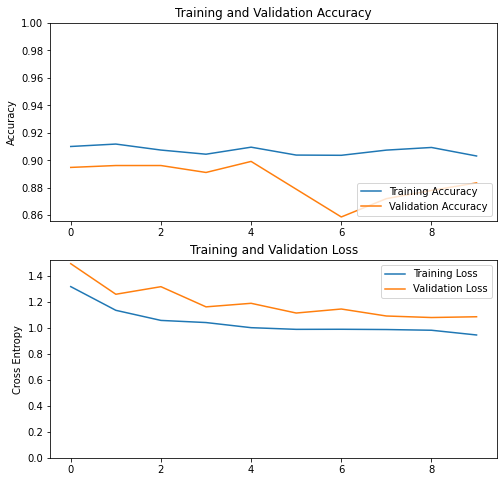

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
base_model.trainable = True

In [0]:
# base model의 layer 갯수를 확인
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  155


In [0]:
# Fine tuning을 시킬 기준 layer 선정
# fine_tune_at = 15
fine_tune_at = 130

# Fine tuning을 시킬 기준 layer 이전의 layer들을 모두 freezing
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=0.00001),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,363,201
Non-trainable params: 896,064
_________________________________________________________________


In [0]:
len(model.trainable_variables)

28

In [0]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size

history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=test_generator, 
                                   validation_steps=validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
745/745 [==============================] - 199s 267ms/step - loss: 0.9255 - accuracy: 0.9060 - val_loss: 1.0463 - val_accuracy: 0.8840
Epoch 2/10
745/745 [==============================] - 198s 265ms/step - loss: 0.7585 - accuracy: 0.9255 - val_loss: 0.9889 - val_accuracy: 0.9037
Epoch 3/10
745/745 [==============================] - 196s 264ms/step - loss: 0.6848 - accuracy: 0.9336 - val_loss: 1.0026 - val_accuracy: 0.9106
Epoch 4/10
745/745 [==============================] - 196s 263ms/step - loss: 0.6197 - accuracy: 0.9422 - val_loss: 1.0140 - val_accuracy: 0.9118
Epoch 5/10
745/745 [==============================] - 192s 258ms/step - loss: 0.5874 - accuracy: 0.9460 - val_loss: 1.0133 - val_accuracy: 0.9118
Epoch 6/10
745/745 [==============================] - 192s 258ms/step - loss: 0.5490 - accuracy: 0.9514 - val_loss: 1.0014 - val_accuracy: 0.9136
Epoch 7/10
745/745 [============================

In [0]:
import time
start = time.time()

pred = model.predict_classes(
    test_generator
)

print("time :", time.time() - start)

time : 33.953789710998535


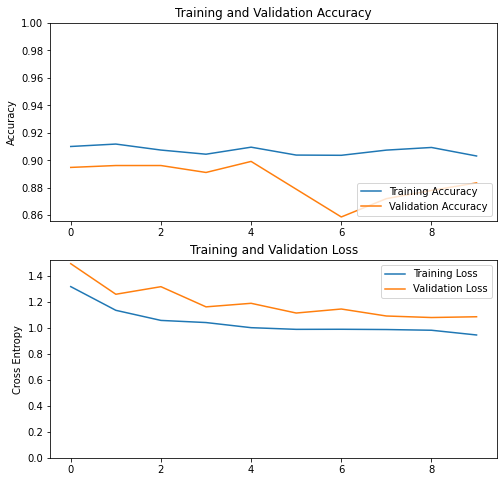

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
from keras.models import load_model
model.save('MobilenetV2.h5')

In [0]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size

history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=test_generator, 
                                   validation_steps=validation_steps)

Epoch 1/10
372/372 [==============================] - 187s 504ms/step - loss: 1.0199 - accuracy: 0.9228 - val_loss: 1.2784 - val_accuracy: 0.9081
Epoch 2/10
372/372 [==============================] - 188s 505ms/step - loss: 0.9386 - accuracy: 0.9279 - val_loss: 1.2625 - val_accuracy: 0.9102
Epoch 3/10
372/372 [==============================] - 189s 508ms/step - loss: 0.8807 - accuracy: 0.9308 - val_loss: 1.2237 - val_accuracy: 0.9113
Epoch 4/10
372/372 [==============================] - 193s 519ms/step - loss: 0.8303 - accuracy: 0.9324 - val_loss: 1.2065 - val_accuracy: 0.9120
Epoch 5/10
372/372 [==============================] - 190s 511ms/step - loss: 0.7308 - accuracy: 0.9347 - val_loss: 1.1938 - val_accuracy: 0.9113
Epoch 6/10
372/372 [==============================] - 191s 514ms/step - loss: 0.6229 - accuracy: 0.9377 - val_loss: 1.0891 - val_accuracy: 0.9122
Epoch 7/10
372/372 [==============================] - 188s 505ms/step - loss: 0.5666 - accuracy: 0.9402 - val_loss: 1.1342 -

In [0]:
from keras.models import load_model
model.save('MobilenetV2_batch64.h5')

In [0]:
epochs = 15
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size

history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=test_generator, 
                                   validation_steps=validation_steps)

Epoch 1/15
372/372 [==============================] - 193s 520ms/step - loss: 0.4704 - accuracy: 0.9492 - val_loss: 0.8850 - val_accuracy: 0.9200
Epoch 2/15
372/372 [==============================] - 191s 513ms/step - loss: 0.4563 - accuracy: 0.9531 - val_loss: 0.8911 - val_accuracy: 0.9212
Epoch 3/15
372/372 [==============================] - 192s 517ms/step - loss: 0.4469 - accuracy: 0.9562 - val_loss: 0.8962 - val_accuracy: 0.9210
Epoch 4/15
372/372 [==============================] - 192s 517ms/step - loss: 0.4246 - accuracy: 0.9583 - val_loss: 0.8789 - val_accuracy: 0.9212
Epoch 5/15
372/372 [==============================] - 192s 516ms/step - loss: 0.4158 - accuracy: 0.9609 - val_loss: 0.8705 - val_accuracy: 0.9223
Epoch 6/15
372/372 [==============================] - 189s 508ms/step - loss: 0.4118 - accuracy: 0.9621 - val_loss: 0.9056 - val_accuracy: 0.9210
Epoch 7/15
372/372 [==============================] - 188s 505ms/step - loss: 0.4029 - accuracy: 0.9653 - val_loss: 0.8615 -